In [1]:
%matplotlib inline


# Giant Component

This example illustrates the sudden appearance of a
giant connected component in a binomial random graph.

This example needs Graphviz and PyGraphviz.


In [8]:
# !pip install pygraphviz==1.10
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/" 

  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Skipping wheel build for pygraphviz, due to binaries being disabled for it.
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'


  error: subprocess-exited-with-error
  
  Running setup.py install for pygraphviz did not run successfully.
  exit code: 1
  
  [6 lines of output]
  usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: setup.py --help [cmd1 cmd2 ...]
     or: setup.py --help-commands
     or: setup.py cmd --help
  
  error: option --include-path not recognized
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: legacy-install-failure

Encountered error while trying to install package.

pygraphviz

note: This is an issue with the package mentioned above, not pip.
hint: See above for output from the failure.


ImportError: requires pygraphviz http://pygraphviz.github.io/

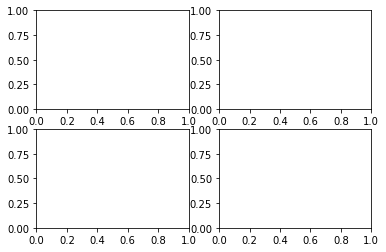

In [5]:
import math

import matplotlib.pyplot as plt
import networkx as nx

n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / n

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

fig, axes = plt.subplots(2, 2)
for p, ax, seed in zip(pvals, axes.ravel(), range(len(pvals))):
    #### generate graph ####
    G = nx.binomial_graph(n, p, seed=seed)
    # identify connected/disconnected nodes
    connected = [n for n, d in G.degree() if d > 0]
    disconnected = list(set(G.nodes()) - set(connected))
    # identify largest connected component
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    #### draw graph ####
    pos = nx.nx_agraph.graphviz_layout(G)
    ax.set_title(f"p = {p:.3f}")
    # draw largest connected component
    options = {"ax": ax, "edge_color": "tab:red"}
    nx.draw_networkx_edges(G0, pos, width=6.0, **options)
    # draw other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
    # draw connected/disconnected nodes
    options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
    nx.draw(G, pos, nodelist=connected, **options)
    nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)
fig.tight_layout()
plt.show()